In [1]:
using LatBo

mmHg = 133.3223684211
Npoints = 30, 30
δt, δx = 5e-4, 1e-3
μ₀ = 0.01sqrt(1./3.) * δt / δx
sim = lbgk(:D2Q9, Npoints, δt, δx; viscosity=4e-1, p₀=80.0 * mmHg, μ₀ = ones(2)μ₀)
Playground.initialize(sim.playground) do i, j
    if j == 1
        return Playground.INLET
    elseif j == Npoints[2]
        return Playground.OUTLET
    elseif j == 1 || j == Npoints[2] || i == 1 || i == Npoints[1]
        return Playground.SOLID
    else
        return Playground.FLUID
    end
end
nothing

First run the simulation so it settles a bit.

In [2]:
run!(sim, nsteps=2max(Npoints...))

In [3]:
@time run!(sim, nsteps=500, doinit=false)

  1.582413 seconds (17.99 M allocations: 707.688 MB, 3.76% gc time)


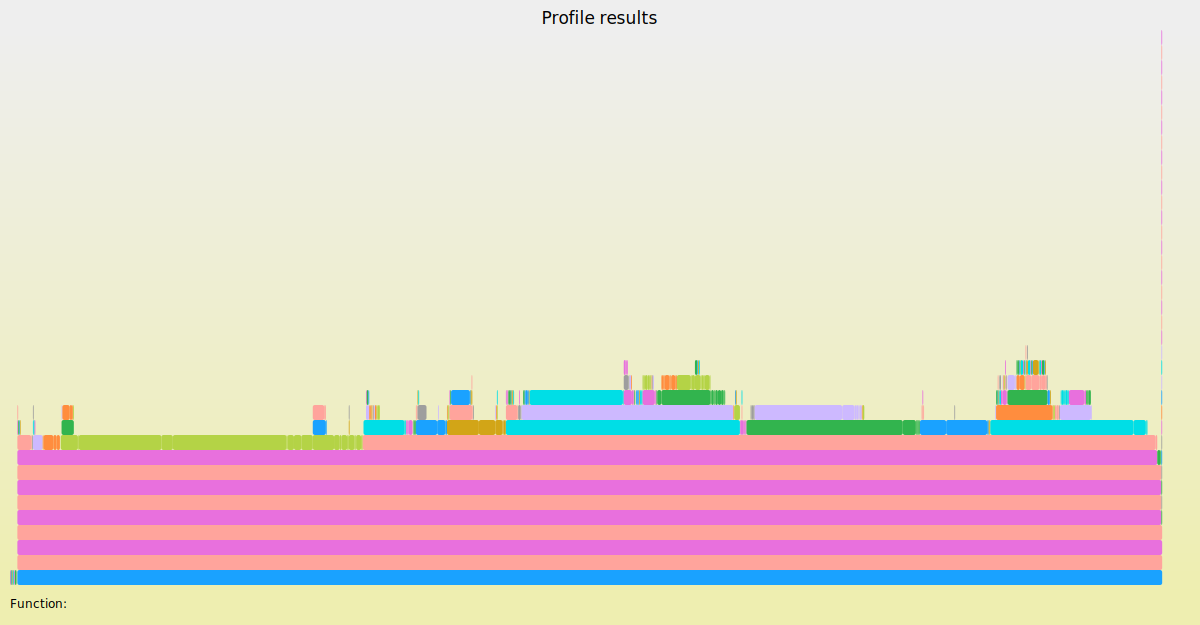

In [4]:
using ProfileView
Profile.clear()
@profile run!(sim, doinit=false, nsteps=500)
ProfileView.view()